<b>¡Hola María!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


# PROYECTO TIENDA ONLINE

Realizaremos un **análisis exploratorio de la estructura de los datos** para conocer; la consistencia en los **nombres de las columnas**, asegurando que sean intuitivos y libres de errores tipográficos; evaluaremos la **cantidad** total de registros y columnas para entender la escala del conjunto de datos; identificaremos los **tipos de datos** asignados a cada columna, la correcta asignación de tipos de datos es esencial para evitar errores en cálculos y para asegurar que las operaciones estadísticas y las visualizaciones se realicen de manera apropiada y, realizaremos la detección de **valores nulos o duplicados** que podrían sesgar los resultados.

Posteriormente, ejecutaremos **pruebas de hipótesis** que nos permitirán validar las iniciativas que ayudarán a **aumentar los ingresos**. Los hallazgos derivados de estas pruebas serán la base fundamental para orientar y justificar las decisiones de negocio.

# PRIMERA PARTE DEL PROYECTO

## ACCESO A LOS DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st

In [2]:
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

### PRIORIZACIÓN DE HIPÓTESIS

#### ANÁLISIS DE ESTRUCTURA

In [3]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


El DataFrame hipótesis cuenta con 5 columnas, que obtuvimos aplicando el método **(.info)** vemos que no hay valores ausentes, pues cada columna cuenta con el mismo número de filas. Al tener solo 9 filas, imprimimos el DataFrame completo para visualizar su estructura y como está la data.

#### Framework ICE

In [5]:
hipotesis['ICE'] = ((hipotesis['Impact'] * hipotesis['Confidence'])/hipotesis['Effort']).round(2)
hipotesis = hipotesis.sort_values(by="ICE", ascending=False)
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.20
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33
7,Add a subscription form to all the main pages....,10,7,8,5,11.20
6,Show banners with current offers and sales on ...,5,3,8,3,8.00
2,Add product recommendation blocks to the store...,8,3,7,3,7.00
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00
5,Add a customer review page. This will increase...,3,2,2,3,1.33
3,Change the category structure. This will incre...,8,3,3,8,1.12
4,Change the background color on the main page. ...,3,1,1,1,1.00


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Excelente trabajo al calcular y ordenar el puntaje ICE. Esto demuestra una buena comprensión de cómo priorizar hipótesis basadas en impacto, confianza y esfuerzo.
</div>


Al aplicar la metodología de priorización de hipótesis **ICE** sobre el análisis de (Impacto, Confianza, Esfuerzo), obtenemos que la hipótesis **Launch a promotion that gives users discounts** es decir, el lanzar una promoción que da descuentos a los usuarios, tiene el puntaje ICE más alto **16.20**. Esto sugiere que es la iniciativa más adecuada para empezar, ya que combina un alto impacto, alta confianza en su éxito, y un esfuerzo relativamente bajo.

La segunda en prioridad es **Add two new channels for attracting traffic** es decir, añadir dos nuevos canales para atraer tráfico, con un ICE de **13.33**, también es una candidata fuerte para ser considerada.

La hipótesis de lanzar una promoción tiene un alto impacto (9), lo que contribuye significativamente a su alto ICE. Similarmente, a la hipótesis de añadir nuevos canales.

Ambas hipótesis también tienen una alta confianza (9 y 8 respectivamente), lo que significa que hay una fuerte creencia en que los resultados esperados se realicen.

El esfuerzo, al ser denominador, muestra que mientas más bajo sea este, su ICE será alto. La primera hipótesis tiene un esfuerzo de 5, que es moderado, pero combinado con el alto impacto y confianza, lo hace sobresalir.

#### Framework RICE

In [6]:
hipotesis['RICE'] = ((hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence'])/hipotesis['Effort']).round(2)
hipotesis = hipotesis.sort_values(by="RICE", ascending=False)
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.20,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.33,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.00,3.0


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Muy bien al implementar el cálculo del puntaje RICE, lo cual añade una dimensión adicional de alcance a tus hipótesis. Esto es crucial para una evaluación más completa.
</div>


Al aplicar la metodología de priorización de hipótesis **RICE** donde se incluye el factor (Alcance), significa que se ha incluido la cantidad de usuarios a la que afectará la hipótesis.

La introducción del alcance ha alterado significativamente el orden de las hipótesis en comparación con el puntaje ICE, vemos que la hipótesis **Add a subscription form to all the main pages**, es decir añadir un formulario de suscripción a todas las páginas principales, es ahora la número 1, con un puntaje RICE de **112.0**, su alto alcance (10) es el factor principal que la impulsa a la cima, a pesar de que su impacto (7) no era el más alto individualmente.

La hipótesis **Add product recommendation blocks to the store** es decir, añadir bloques de recomendación de productos a la tienda, sube al segundo lugar con un RICE de **56.0**, su alto alcance (8) siendo un indicador relevante.

#### RICE vs ICE

La hipótesis de lanzar una promoción que da descuentos a los usuarios, que era la número 1 con ICE, ahora ha caído considerablemente en la lista, con un RICE de solo **16.2**, esto se debe a su muy bajo alcance (1). A pesar de su alto impacto y confianza, si solo llega a una pequeña fracción de usuarios, su impacto total se ve minimizado.

La iniciativa de añadir dos nuevos canales para atraer tráfico, también ha caído de la segunda posición, a la tercera, con un RICE **40.0** debido a su alcance relativamente bajo (3).

El incluir el alcance como variable ha llevado a un cambio en las prioridades, donde las iniciativas que pueden afectar a una mayor cantidad de usuarios son las primeras, esto es importante considerar, ya que en una tienda online, la primera fase del embudo, el **awareness** es fundamental.

# SEGUNDA PARTE DEL PROYECTO

## ACCESO A LOS DATOS

In [7]:
ordenes = pd.read_csv('/datasets/orders_us.csv')
visitas = pd.read_csv('/datasets/visits_us.csv')

### ORDENES

#### ANÁLISIS DE ESTRUCTURA

In [8]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
ordenes.sample(5)

,transactionId,visitorId,date,revenue,group
1076,1223278263,3826874025,2019-08-12,135.0,A
1080,3498400794,3419266314,2019-08-12,125.5,B
237,2305128914,4134011281,2019-08-23,95.6,A
653,2107411712,2819363575,2019-08-07,25.5,B
492,3330749678,3367493247,2019-08-26,140.7,B


In [10]:
ordenes.duplicated().sum( )

0

El DataFrame de órdenes cuenta con 5 columnas, que obtuvimos aplicando el método **(.info)** vemos que no hay valores ausentes, pues cada columna cuenta con el mismo número de filas. Así mismo, tenemos 1 columna que es necesario convertir su tipo, para los futuros análisis, que es **date**. Con el método **(.sample)** obtenemos aleatoriamente filas para visualizar su estructura y como está la data. Adicionalmente, aplicamos el método **(.duplicated)** para conocer si hay filas con duplicados explícitos.

#### LIMPIEZA DE DATOS

In [11]:
ordenes['date'] = pd.to_datetime(ordenes['date'])

<div class="alert alert-block alert-success">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
Muy bien al convertir la columna 'date' a un formato de fecha. Esto es esencial para realizar análisis de series temporales de manera efectiva y asegura que las operaciones basadas en fechas se realicen correctamente.
</div>


In [12]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Aplicamos el método **(.to_datetime)** para transformar la columna **date** a tipo fecha. Analizando los campos de todas las tablas, vemos que la tabla de visitas, contiene la columna **group**, columna que también posee la tabla de órdenes, con el mismo nombre, por lo que no es necesario cambiarlo. Posteriormente, aplicamos nuevamente el método **(.info)** para validar la transformación.

### VISITAS

#### ANÁLISIS DE ESTRUCTURA

In [13]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitas.sample(5)

,date,group,visits
10,2019-08-11,A,718
34,2019-08-04,B,770
49,2019-08-19,B,487
17,2019-08-18,A,668
37,2019-08-07,B,709


In [15]:
visitas.duplicated().sum( )

0

El DataFrame de visitas cuenta con 3 columnas, que obtuvimos aplicando el método **(.info)** vemos que no hay valores ausentes, pues cada columna cuenta con el mismo número de filas. Así mismo, tenemos 1 columna que es necesario convertir su tipo, para los futuros análisis, que es **date**. Con el método **(.sample)** obtenemos aleatoriamente filas para visualizar su estructura y como está la data. Adicionalmente, aplicamos el método **(.duplicated)** para conocer si hay filas con duplicados explícitos.

#### LIMPIEZA DE DATOS

In [16]:
visitas['date'] = pd.to_datetime(visitas['date'])

In [17]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Aplicamos el método **(.to_datetime)** para transformar la columna **date** a tipo fecha. Posteriormente, aplicamos nuevamente el método **(.info)** para validar la transformación.

## ANÁLISIS DE TEST A/B

In [18]:
fecha_max_ordenes = ordenes['date'].max()
print(fecha_max_ordenes)
fecha_min_ordenes = ordenes['date'].min()
print(fecha_min_ordenes)

2019-08-31 00:00:00
2019-08-01 00:00:00


In [19]:
fecha_max_visitas = visitas['date'].max()
print(fecha_max_visitas)
fecha_min_visitas = visitas['date'].min()
print(fecha_min_visitas)

2019-08-31 00:00:00
2019-08-01 00:00:00


### INGRESO ACUMULADO

In [20]:
ingreso_acumulado_groups = ordenes[['date','group','revenue']].drop_duplicates()

In [21]:
ingreso_A = ingreso_acumulado_groups[ingreso_acumulado_groups['group']=='A'][['date','group','revenue']]
ingreso_A_per_date = ingreso_A.groupby(['date','group'])['revenue'].sum().reset_index()
ingreso_A_per_date['revenue_acumulado'] = ingreso_A_per_date['revenue'].cumsum()

In [22]:
ingreso_B = ingreso_acumulado_groups[ingreso_acumulado_groups['group']=='B'][['date','group','revenue']]
ingreso_B_per_date = ingreso_B.groupby(['date','group'])['revenue'].sum().reset_index()
ingreso_B_per_date['revenue_acumulado'] = ingreso_B_per_date['revenue'].cumsum()

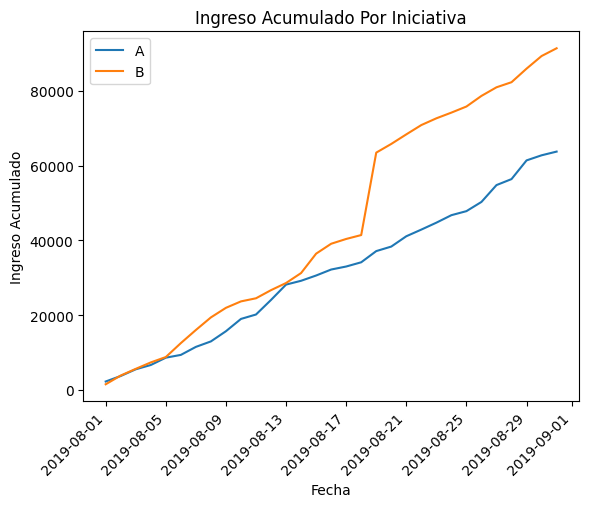

In [23]:
plt.plot(ingreso_A_per_date['date'], ingreso_A_per_date['revenue_acumulado'], label='A')
plt.plot(ingreso_B_per_date['date'], ingreso_B_per_date['revenue_acumulado'], label='B')
plt.title('Ingreso Acumulado Por Iniciativa')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.xticks(rotation=45, ha='right')
plt.legend()

<div class="alert alert-block alert-success">
<b>Celda [23]</b> <a class="tocSkip"></a><br>
El gráfico de ingreso acumulado por iniciativa está bien realizado y proporciona una visión clara de cómo evolucionan los ingresos en el tiempo para cada grupo. Buen trabajo al elegir etiquetas claras y rotar las fechas para mejorar la legibilidad.
</div>


Primero es importante, conocer el periodo en el que se aplicaron las iniciativas, por lo que obtuvimos la fecha máxima y la mínima de ambos DataFrame, por lo que usamos los métodos, **(.max) y (.min)**. Tenemos como resultado, que las iniciativas se aplicaron en el mes de agosto del 2019, con una duración de 30 días. 

Para el análisis de ingresos acumulados, obtuvimos los ingresos acumulados de cada grupo, con el método **(.dropduplecates)**, obtuvimos los datos únicos por ingreso de cada grupo, en cada fecha. Con esto separamos los dos grupos, filtrando cada uno, posteriormente agrupamos por fecha con el método **(.groupby)**, el ingreso, e incorporamos una columna con el ingreso acumulado con el método **(.cumsum)**. Finalmente, graficamos los 2 grupos con líneas para conocer el comportamiento de las pruebas con la librería **plt**.

La gráfica **"Ingreso Acumulado Por Iniciativa"** evidencia que el **Grupo B** está obteniendo resultados notablemente **superiores** en términos de ingresos acumulados. Su **curva de crecimiento es consistentemente más elevada**, lo que indica que las condiciones de prueba aplicadas a este grupo están generando un incremento más rápido y sustancial en los ingresos a medida que transcurre el tiempo. Este hallazgo inicialmente muestra la necesidad de profundizar las acciones que contribuyen a este comportamiento, para replicar el éxito del Grupo B.

### TAMAÑO DE PEDIDO

In [24]:
pedido_A = ordenes[ordenes['group']=='A'][['date','group','transactionId','revenue']]
revenue_per_pedido_A = pedido_A.groupby(['date', 'group']).agg(cant_pedidos = ('transactionId', 'nunique'),revenue_per_pedido = ('revenue', 'sum')).reset_index()
revenue_per_pedido_A['revenue_acumulado'] = revenue_per_pedido_A['revenue_per_pedido'].cumsum()
revenue_per_pedido_A['pedidos_acumulado'] = revenue_per_pedido_A['cant_pedidos'].cumsum()
revenue_per_pedido_A['Size_pedido'] = revenue_per_pedido_A['revenue_acumulado']/revenue_per_pedido_A['pedidos_acumulado']

In [25]:
pedido_B = ordenes[ordenes['group']=='B'][['date','group','transactionId','revenue']]
revenue_per_pedido_B = pedido_B.groupby(['date', 'group']).agg(cant_pedidos = ('transactionId', 'nunique'),revenue_per_pedido = ('revenue', 'sum')).reset_index()
revenue_per_pedido_B['revenue_acumulado'] = revenue_per_pedido_B['revenue_per_pedido'].cumsum()
revenue_per_pedido_B['pedidos_acumulado'] = revenue_per_pedido_B['cant_pedidos'].cumsum()
revenue_per_pedido_B['Size_pedido'] = revenue_per_pedido_B['revenue_acumulado']/revenue_per_pedido_B['pedidos_acumulado']

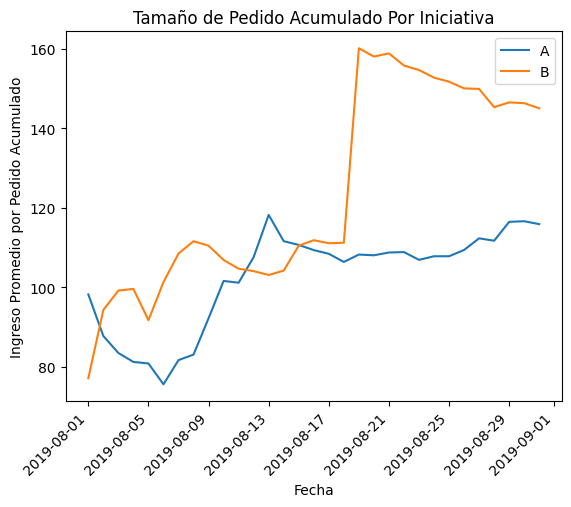

In [26]:
plt.plot(revenue_per_pedido_A['date'], revenue_per_pedido_A['Size_pedido'], label='A')
plt.plot(revenue_per_pedido_B['date'], revenue_per_pedido_B['Size_pedido'], label='B')
plt.title('Tamaño de Pedido Acumulado Por Iniciativa')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Promedio por Pedido Acumulado')
plt.xticks(rotation=45, ha='right')
plt.legend()

<div class="alert alert-block alert-success">
<b>Celda [26]</b> <a class="tocSkip"></a><br>
Excelente visualización del tamaño de pedido acumulado por iniciativa. Esto ayuda a identificar tendencias y diferencias entre los grupos A y B a lo largo del tiempo, permitiendo un análisis comparativo efectivo.
</div>


Para el análisis del tamaño del pedido acumulado, filtramos cada grupo, posteriormente agrupamos por fecha el método **(.groupby)**, sumamos el ingreso y contamos números únicos de los pedidos, posteriormente incorporamos 2 columnas con la suma de ingreso acumulado y el conteo de pedidos únicos acumulado, con el método **(.cumsum)**. Finalmente, graficamos los 2 grupos con líneas para conocer el comportamiento de las pruebas con la librería **plt**.

En la gráfica **"Tamaño de Pedido Acumulado" Ambos grupos** muestran una tendencia general al alza en el ingreso promedio por pedido acumulado, lo que sugiere que, en general, el valor de los pedidos está creciendo a lo largo del tiempo en ambos escenarios, aunque de manera diferenciada. Alrededor del 17-18 de agosto, el **Grupo B** experimenta un **salto vertical** significativo y pronunciado en su "Ingreso Promedio por Pedido Acumulado", este es un punto de inflexión donde el rendimiento del Grupo B se dispara y la brecha con el Grupo A se amplía considerablemente. 

#### Diferecia del Tamaño del Pedido

In [27]:
merge_hipotesis = revenue_per_pedido_A.merge(revenue_per_pedido_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

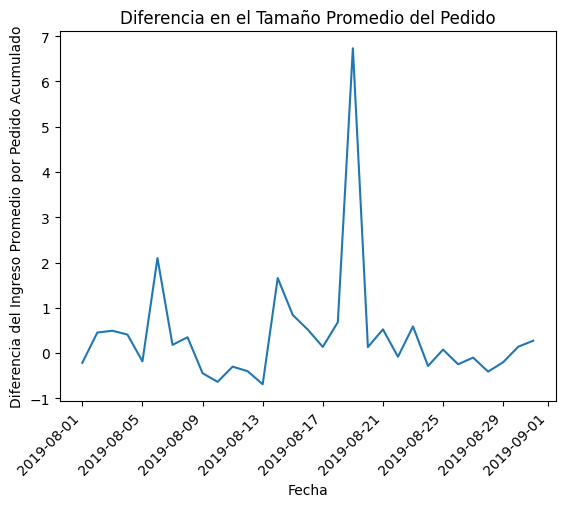

In [28]:
plt.plot(merge_hipotesis['date'], (merge_hipotesis['revenue_per_pedidoB']/merge_hipotesis['cant_pedidosB'])/(merge_hipotesis['revenue_per_pedidoA']/merge_hipotesis['cant_pedidosA'])-1)
plt.title('Diferencia en el Tamaño Promedio del Pedido')
plt.xlabel('Fecha')
plt.ylabel('Diferencia del Ingreso Promedio por Pedido Acumulado')
plt.xticks(rotation=45, ha='right')
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
El gráfico sobre la diferencia en el tamaño promedio del pedido es interesante y se beneficia de una explicación adicional.
</div>


Para obtener la diferencia entre los 2 grupos, unimos los 2 Dataframe aplicando el método **(.merge)** y graficamos la diferencia con líneas para conocer el comportamiento con la librería **plt**.

La gráfica **"Diferencia en el Tamaño Promedio del pedido"** de diferencia relativa en el tamaño promedio acumulado de los pedidos, muestra que la diferencia entre los grupos no es constante ni sustancial a lo largo del tiempo. Se observa un **pico muy marcado** entre el 17 y el 21 de agosto, lo cual indica un evento de impacto extremo y puntual que generó una ventaja significativa en ese momento. Fuera de este pico, la **diferencia es mínima**, sugiriendo que, en el resto del periodo, el **crecimiento relativo** en el tamaño promedio de los pedidos **entre los dos grupos fue marginal**.

### TASA DE CONVERSIÓN

In [29]:
ordenes_per_day = ordenes.groupby(['date','group']).agg(cantidad_pedidos=('transactionId', 'nunique')).reset_index()
visitas_per_day = visitas.groupby(['date','group'])['visits'].sum().reset_index()

In [30]:
merge_df = pd.merge(ordenes_per_day, visitas_per_day, on=['date', 'group'], how='inner')

In [31]:
merge_df['pedidos_acumulado'] = merge_df['cantidad_pedidos'].cumsum()
merge_df['visitas_acumulado'] = merge_df['visits'].cumsum()

In [32]:
merge_df['conversion'] = (merge_df['pedidos_acumulado']/merge_df['visitas_acumulado']*100).round(2)

In [33]:
merge_A = merge_df[merge_df['group']=='A'][['date','conversion']]
merge_B = merge_df[merge_df['group']=='B'][['date','conversion']]

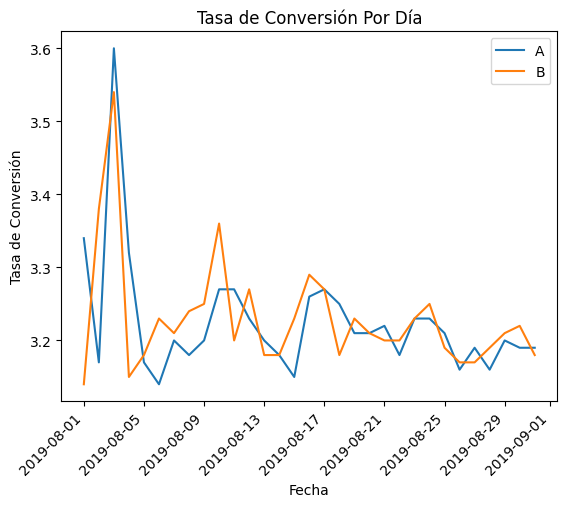

In [34]:
plt.plot(merge_A['date'], merge_A['conversion'], label='A')
plt.plot(merge_B['date'], merge_B['conversion'], label='B')
plt.title('Tasa de Conversión Por Día')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45, ha='right')
plt.legend()

<div class="alert alert-block alert-success">
<b>Celda [34]</b> <a class="tocSkip"></a><br>
La visualización de la tasa de conversión por día está bien ejecutada. Has utilizado etiquetas y leyendas adecuadas para facilitar la interpretación de los resultados, lo cual es crucial para comunicar hallazgos de manera efectiva.
</div>


Para el análisis de la tasa de conversión por día, filtramos cada grupo, posteriormente agrupamos por fecha el método **(.groupby)** y contamos, posteriormente incorporamos 2 columnas con la suma de pedido y de visitas acumulado, con el método **(.cumsum)**. Finalmente, graficamos los 2 grupos con líneas para conocer el comportamiento de las pruebas con la librería **plt**.

La gráfica **"Tasa de Conversión Por Día"** muestra dos líneas muestran un **comportamiento muy similar** a lo largo de todo el período. Los picos de la tasa de conversión del Grupo A se reflejan casi idénticamente en el Grupo B, y viceversa. Esto puede mostrar un **tema de estacionalidad** que afecta a ambos grupos de manera similar.  Si el experimento buscaba mejorar la tasa de conversión, este gráfico muestra que lo aplicado tanto en el Grupo A y al Grupo B **no tuvieron un efecto diferenciador**.

### PEDIDOS POR USUARIO

In [35]:
pedidos_per_users = (ordenes.groupby(['visitorId', 'group'])['transactionId'].nunique()).reset_index()

In [36]:
pedido_B_per_user = pedidos_per_users[pedidos_per_users['group']=='B'][['visitorId','transactionId']]
pedido_A_per_user = pedidos_per_users[pedidos_per_users['group']=='A'][['visitorId','transactionId']]

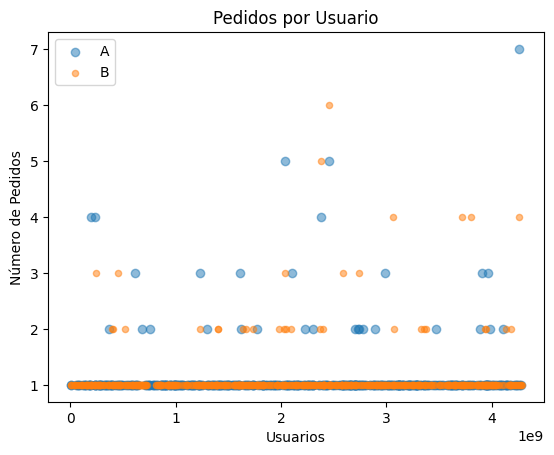

In [37]:
plt.scatter(pedido_A_per_user['visitorId'], pedido_A_per_user['transactionId'], label='A', alpha=0.5)
plt.scatter(pedido_B_per_user['visitorId'], pedido_B_per_user['transactionId'], label='B', alpha=0.5, s=20)
plt.title('Pedidos por Usuario')
plt.xlabel('Usuarios')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.show()

Para el análisis del número de pedidos por usuario, filtramos cada grupo, posteriormente agrupamos por usuario **(.groupby)** y contamos los pedidos. Finalmente, graficamos los 2 grupos con gráfica de dispersión para conocer el comportamiento de las pruebas con la librería **plt**, adicionalmente aplicamos transparencias y cambios de tamaños, para poder visualizar la diferencias.

Esta gráfica **"Pedidos Por Usuarios"**, en conjunto, nos muestra que las iniciativas probadas en este experimento **no tuvieron un impacto diferenciador en la recurrencia** con la que los usuarios realizan pedidos. 

La **fidelidad** del cliente y los patrones de compra recurrente son métricas que se desarrollan y se observan de manera significativa **a mediano y largo plazo**. Un mes es generalmente insuficiente para medir los hábitos de compra recurrentes de los usuarios.

#### Análisis de Percentiles de los Pedidos Por Usuario

In [38]:
print(np.percentile(pedidos_per_users['transactionId'], [95, 99]))

[2. 4.]


<div class="alert alert-block alert-success">
<b>Celda [38]</b> <a class="tocSkip"></a><br>
Has calculado los percentiles 95 y 99 para los pedidos por usuario, lo cual es útil para identificar valores atípicos.
</div>


Aplicamos el método **(.percentil de la librería np)** sobre los porcentajes de 95%, 99%.


Las distribuciones de puntos para el Grupo A (azul) y el Grupo B (naranja) se superponen significativamente, y la transparencia aplicada confirma que no hay una diferencia visual perceptible en la frecuencia de compra por usuario entre ambos grupos. 

Al unir los datos de ambos grupos, la métrica de percentil revela que **no más del 5% de usuarios realizan más de 2 pedidos**, lo que corrobora lo indicado, que la mayoría de los clientes son compradores de baja frecuencia o de una sola vez. Así tenemos, que **no más del 1% hacen más 4 pedidos**, lo cual es aún más extremo.

### PRECIOS POR PEDIDO

In [39]:
precio_per_pedido = ordenes.groupby(['transactionId', 'group']).agg(pedido_precio = ('revenue','sum')).reset_index()

In [40]:
precio_B_per_pedido = precio_per_pedido[precio_per_pedido['group']=='B'][['transactionId','pedido_precio']]
precio_A_per_pedido = precio_per_pedido[precio_per_pedido['group']=='A'][['transactionId','pedido_precio']]
precio_B_per_pedido 

,transactionId,pedido_precio
1,4919758,40.2
4,11068804,75.7
5,19446369,55.2
6,19467429,45.5
8,29438557,55.4
...,...,...
1182,4230875336,40.7
1184,4238948438,5.6
1186,4244481880,20.4
1187,4252514150,235.6


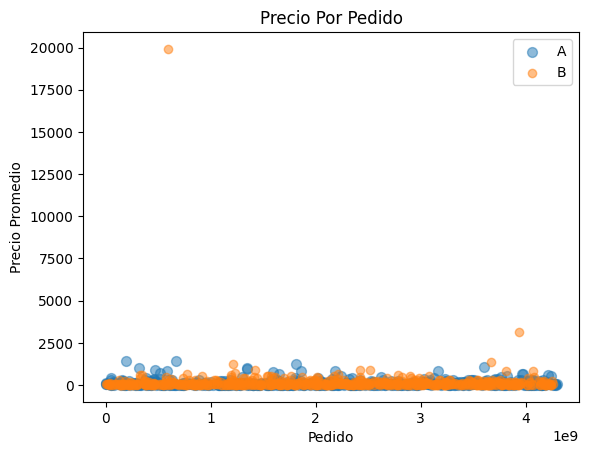

In [41]:
plt.scatter(precio_A_per_pedido['transactionId'], precio_A_per_pedido['pedido_precio'], label='A', alpha=0.5, s=50)
plt.scatter(precio_B_per_pedido['transactionId'], precio_B_per_pedido['pedido_precio'], label='B', alpha=0.5)
plt.title('Precio Por Pedido')
plt.xlabel('Pedido')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()

Para el análisis del precio por pedido, agrupamos por pedido pon el método **(.groupby)** y sumamos sus ingresos. Posteriormente agrupamos por grupo. Finalmente, graficamos los 2 grupos con gráfico de dispersión para conocer el comportamiento de las pruebas con la librería **plt**.

La gráfica de dispersión **"Precio Por Pedido"**, que visualiza el **valor individual de cada pedido** para los Grupos A y B, nos muestra un **pico extremadamente grande y singular** en el Grupo B. Este valor atípico, que se sitúa cerca de los 20,000, contrasta drásticamente con la vasta mayoría de los pedidos, los cuales se concentran en el rango inferior del eje Y. Este único "pico" tiene un efecto significativo y distorsionador para la compresión por lo que nuestra estrategia procederá en dos fases:

Primero, realizaremos un análisis **detallado de los percentiles** sobre la cantidad y el precio de los pedidos. Esto nos permitirá cuantificar identificar la proporción de transacciones que caen en diferentes rangos de precio y entendiendo dónde se concentra la mayor parte del volumen de ventas. 

Posteriormente, para un análisis más profundo de las iniciativas y su impacto en el comportamiento de compra típico, procederemos a **retirar este pico extremo**. Al excluir este valor atípico, podremos reescalar la gráfica, revelando patrones y diferencias que actualmente no las visualizamos.

#### Análisis de Percentiles del Precio de los Pedidos

In [42]:
print(np.percentile(precio_per_pedido['pedido_precio'], [95, 99]))

[435.54  900.904]


Aplicamos el método **(.percentil de la librería np)** sobre los porcentajes de 95%, 99%.

Las distribuciones de puntos para el Grupo A (azul) y el Grupo B (naranja) se superponen drásticamente, y la transparencia aplicada confirma que hay una gran concentración visual perceptible en el precio de los pedidos. 

Al unir los datos de ambos grupos, la métrica de percentil revela que **no más del 5% de usuarios realizan pedidos no mayor a USD 435.54**. Así tenemos, que **no más del 1%  realizan pedidos más de USD 900.94**.

**Procederemos a retirar valores anómalos**

In [43]:
precio_per_pedido_sin_pico = precio_per_pedido[precio_per_pedido['pedido_precio']<900.904][['transactionId','pedido_precio','group']]

In [44]:
precio_B_per_pedido_sin_pico = precio_per_pedido_sin_pico[precio_per_pedido_sin_pico['group']=='B'][['transactionId','pedido_precio']]
precio_A_per_pedido_sin_pico = precio_per_pedido_sin_pico[precio_per_pedido_sin_pico['group']=='A'][['transactionId','pedido_precio']] 

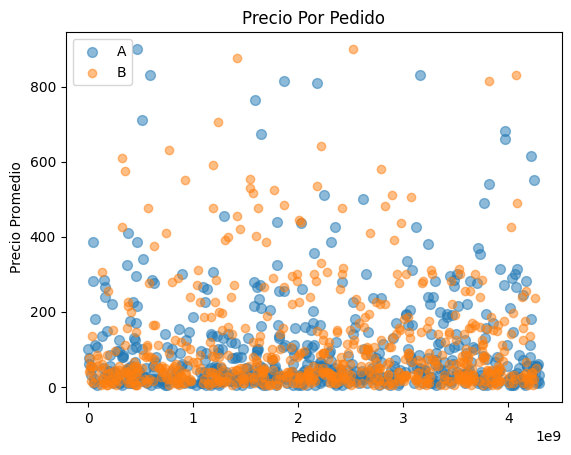

In [45]:
plt.scatter(precio_A_per_pedido_sin_pico['transactionId'], precio_A_per_pedido_sin_pico['pedido_precio'], label='A', alpha=0.5, s=50)
plt.scatter(precio_B_per_pedido_sin_pico['transactionId'], precio_B_per_pedido_sin_pico['pedido_precio'], label='B', alpha=0.5)
plt.title('Precio Por Pedido')
plt.xlabel('Pedido')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()

La nueva gráfica de dispersión **"Precio Por Pedido"**, con el 1% superior de los valores retirado, ofrece una perspectiva mucho más clara y comparable de la distribución del precio por pedido para la gran mayoría de las transacciones en ambos grupos. Evidenciamos que **no hay un "valor promedio"** único y dominante que caracterice a todos los pedidos; en cambio, **existe un rango de precios**.


### SIGNIFICANCIA ESTADÍSTICA

**Existe diferencia entre la conversión de las 2 iniciativas?**

In [46]:
resultado_prueba_t = st.ttest_ind(merge_A['conversion'], merge_B['conversion'])
pvalue = resultado_prueba_t.pvalue
alpha = 0.05
print(f"Valor p: {pvalue}")

if pvalue > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Hay suficiente evidencia para rechazar la hipótesis nula.")

Valor p: 0.8153516434304972
No hay suficiente evidencia para rechazar la hipótesis nula.


<div class="alert alert-block alert-warning">
<b>Celda [46]</b> <a class="tocSkip"></a><br>
Has realizado una prueba t para comparar las tasas de conversión entre los grupos. Asegúrate de verificar los supuestos de normalidad y homogeneidad de varianzas antes de interpretar los resultados. Esto es importante para garantizar la validez de la prueba estadística.
</div>


#### Análisis de Percentiles de la Conversión

In [47]:
print(np.percentile(merge_df['conversion'], [95, 99]))

[3.359  3.5634]


**Procederemos a retirar valores anómalos**

In [48]:
conversion_sin_pico = merge_df[merge_df['conversion']<3.359][['pedidos_acumulado','visitas_acumulado','group','date','conversion']]

In [49]:
conversion_A_sin_pico = conversion_sin_pico[conversion_sin_pico['group']=='A'][['date','conversion']]
conversion_B_sin_pico = conversion_sin_pico[conversion_sin_pico['group']=='B'][['date','conversion']]

In [50]:
resultado_prueba_t = st.ttest_ind(conversion_A_sin_pico['conversion'], conversion_B_sin_pico['conversion'])
pvalue = resultado_prueba_t.pvalue
alpha = 0.05
print(f"Valor p: {pvalue}")

if pvalue > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Hay suficiente evidencia para rechazar la hipótesis nula.")

Valor p: 0.740931768894266
No hay suficiente evidencia para rechazar la hipótesis nula.


Dado que el valor **p (0.81)** es mayor que el nivel de significancia α=0.05. No podemos rechazar la hipótesis nula ya que **no hay una diferencia estadísticamente** significativa en la conversión entre los 2 grupos. Las tasas de conversión diarias de ambos grupos se superponen en gran medida y muestran patrones de fluctuación muy similares, aún retirando los picos que se ven en la gráfica.

**Existe diferencia entre el tamaño del pedido de las 2 iniciativas?**

In [51]:
resultado_prueba_t = st.ttest_ind(precio_A_per_pedido['pedido_precio'], precio_B_per_pedido['pedido_precio'])
pvalue = resultado_prueba_t.pvalue
alpha = 0.05
print(f"Valor p: {pvalue}")

if pvalue > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Hay suficiente evidencia para rechazar la hipótesis nula.")

Valor p: 0.40411794485266717
No hay suficiente evidencia para rechazar la hipótesis nula.


In [52]:
resultado_prueba_t = st.ttest_ind(precio_A_per_pedido_sin_pico['pedido_precio'], precio_B_per_pedido_sin_pico['pedido_precio'])
pvalue = resultado_prueba_t.pvalue
alpha = 0.05
print(f"Valor p: {pvalue}")

if pvalue > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Hay suficiente evidencia para rechazar la hipótesis nula.")

Valor p: 0.8173149884724848
No hay suficiente evidencia para rechazar la hipótesis nula.


Dado que el valor **p (0.404)** es mayor que el nivel de significancia α=0.05, **no hay suficiente evidencia estadística para rechazar la hipótesis nula**. Esto significa que, incluso con la presencia del pedido de **muy alto valor en el Grupo B (el "pico")**, la diferencia en el valor promedio del pedido global entre el Grupo A y el Grupo B **no fue lo suficientemente grande o consistente como para ser considerada estadísticamente significativa**.

# DECISION DE NEGOCIO

Este análisis de **test A/B** revela que, si bien el **Grupo B mostró un crecimiento** significativamente mayor en el ingreso acumulado total y en el tamaño promedio de pedido acumulado, este éxito **no se debió a un aumento generalizado** en la tasa de conversión, ni en la frecuencia de pedidos por usuario. Esta ventaja del Grupo B fue impulsada por **uno o muy pocos eventos de valores extremadamente altos**, claramente visibles como un "pico" en la gráfica "Precio Por Pedido", que inflaron sus métricas monetarias acumuladas a mediados de agosto. Las **pruebas estadísticas** confirmaron que, una vez que se consideró el impacto de estos picos, **no hubo una diferencia estadísticamente significativa** en el valor promedio del pedido para la mayoría de las transacciones entre los grupos. Esto sugiere que las iniciativas del Grupo B fueron efectivas para **maximizar el valor de transacciones excepcionales**, pero **no para elevar el valor promedio** de los pedidos. **No hay diferencia relevante** entre las pruebas; sin embargo, **el tiempo de aplicación** y ver resultados es **muy corto**, se debe continuar con la prueba en un tiempo razonable de 3 meses.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
    
¡Muy buen trabajo, María! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>

1. Has implementado correctamente el cálculo y la ordenación de los puntajes ICE y RICE, mostrando una buena comprensión de la priorización de hipótesis.
2. Convertiste adecuadamente las fechas a un formato datetime, lo cual es crucial para el análisis de series temporales.
3. Verificaste la presencia de duplicados en los conjuntos de datos de órdenes y visitas, mostrando atención al detalle en la limpieza de datos.
4. Creaste visualizaciones efectivas para el ingreso acumulado, el tamaño de pedido y la tasa de conversión, utilizando etiquetas claras y rotaciones para mejorar la legibilidad.
5. Utilizaste correctamente el cálculo de percentiles para identificar valores atípicos en los datos de pedidos por usuario.
6. Realizaste pruebas t para comparar métricas clave entre grupos, lo cual es fundamental para el análisis estadístico.
7. Implementaste agrupaciones y cálculos acumulativos de manera efectiva para analizar tendencias a lo largo del tiempo.
8. Mostraste una buena comprensión de cómo utilizar pandas para manipular y analizar datos de manera eficiente.
9. La estructura de tu código es clara y lógica, facilitando la comprensión del flujo de análisis.
10. Has demostrado un buen manejo de las bibliotecas de visualización para comunicar tus hallazgos de manera efectiva.
    
¡Felicidades!

</div>
